In [1]:
import grpc

# import the generated classes
import service.model.style_transfer_rpc_pb2_grpc as style_transfer_rpc_pb2_grpc
import service.model.style_transfer_rpc_pb2 as style_transfer_rpc_pb2

from service import registry
from service.style_transfer import style_transfer_model as st

%matplotlib inline

In [2]:
# Gets endpoint from registry
endpoint = 'localhost:{}'.format(registry['style_transfer_service']['grpc'])

# Open a gRPC channel
channel = grpc.insecure_channel('{}'.format(endpoint))

grpc_method = 'transfer_style'
content_path = './images/Ramon_Duraes.jpg'
style_path = 'https://cdn.shopify.com/s/files/1/2381/6607/products/Artistic_Lion_800x.jpg'

# create a stub (client)
stub = style_transfer_rpc_pb2_grpc.StyleTransferStub(channel)
# create a valid request message
input_info = style_transfer_rpc_pb2.input_info(content_path = content_path,
                                               style_path = style_path,
                                               optimization_iterations = 5,
                                               optimization_rounds = 5)

In [3]:
# make the call
response = stub.transfer_style(input_info)

In [4]:
img = st.base64jpg_to_npimg(response.data)

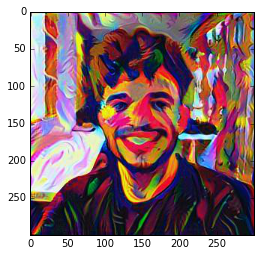

In [5]:
st.print_image(img)

___

___

___

___

___

## Dev:
### Conversion Functions

In [102]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
import base64
from io import BytesIO

In [ ]:
np.asarray(np.transpose(output_image + self.SHIFT, (1, 2, 0)), dtype=np.uint8)

478.0
(956, 956)
array shape: (300, 300, 3)


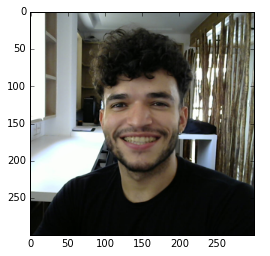

In [96]:
content_path = './images/Ramon_Duraes.jpg'
pic = Image.open(content_path, 'r')

size = 300

hw = pic.size[0] / 2
hh = pic.size[1] / 2
mh = min(hw,hh)
print(mh)
cropped = pic.crop((hw - mh, hh - mh, hw + mh, hh + mh))
print(cropped.size)
npimg = np.asarray(cropped.resize((size, size), Image.BICUBIC), dtype=np.uint8)
print('array shape: {}'.format(array.shape))
plt.imshow(npimg )

In [97]:
base64img = npimg_to_base64jpg(npimg)

In [104]:
npimg_rec = base64jpg_to_npimg(base64img)

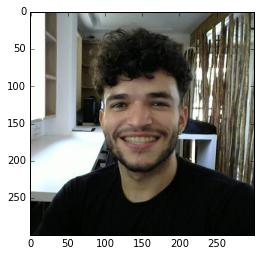

In [105]:
plt.imshow(npimg_rec)

In [86]:
transposed_array = np.ascontiguousarray(np.transpose(array, (2,0,1)))
print('transposed array shape: {}'.format(transposed_array.shape))
content_img = transposed_array -  np.reshape([103.939, 116.779, 123.68], (3, 1, 1)).astype('f')
print('content img shape: {}'.format(content_img.shape))

___

Loaded VGG model.


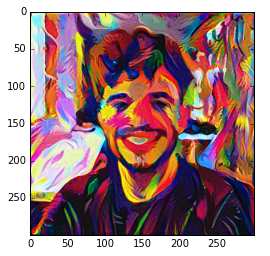

In [21]:
st().print_image(img)

Loaded VGG model.


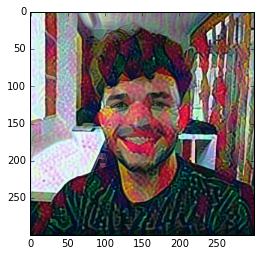

In [16]:
st().print_image(img)

In [6]:
response.data.encode("utf8").__class__

bytes

In [8]:
response.size

300